# <span style="color:#54B1FF">Classification:</span> &nbsp; <span style="color:#1B3EA9"><b>Artificial Neural Networks (ANNs)</b></span>

<br>

This notebook considers the use of [neural networks](https://en.wikipedia.org/wiki/Neural_network) for [supervised](https://en.wikipedia.org/wiki/Supervised_learning) classification. 

In the previous notebooks in this chapter we considered a relatively simple KNN classifier. Artificial neural network (ANN) classifiers represent a powerful set of machine learning algorithms, that are flexible enough to handle almost a wide variet of machine learning problem. ANN classifiers are generally much more complex than KNN classifiers.

This lecture considers just relatively simple ANNs. For further ANN examples refer to the sklearn documentaion [here](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

<br>

___

First let's import the modules we'll need for this notebook.

<br>
<br>

In [1]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score


<a name="toc"></a>

# Table of Contents

* [Example neural network classification](#example)
* [Exploring changes in the decision surface](#exploring)
* [Summary](#summary)


___

<a name="example"></a>
# Example neural network classification
[Back to Table of Contents](#toc)

<br>

Let's use a bigger, more complex dataset than the one we used in the previous notebook. `sklearn.datasets` contains a variety of dataset options for testing classifiers and other machine learning algorithms. Here we'll use the `make_moons` function to create a dataset:

<br>
<br>

Data shape:    (100, 2)
Labels shape:  (100,)


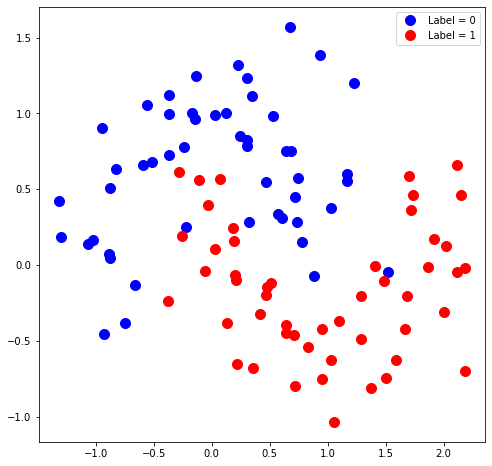

In [2]:

x,labels = make_moons(noise=0.3, random_state=0)

print( f'Data shape:    {x.shape}'  )
print( f'Labels shape:  {labels.shape}'  )


plt.figure(figsize=(8,8))
ax = plt.axes()
x0 = x[labels==0]
x1 = x[labels==1]
ax.plot( x0[:,0], x0[:,1], 'bo', ms=10, label='Label = 0' )
ax.plot( x1[:,0], x1[:,1], 'ro', ms=10, label='Label = 1' )
ax.legend()
plt.show()    



<br>
<br>

A multi-layer perceptron (MLP) classifier (a specific type of ANN classifier) can be defined and trained as follows:

<br>
<br>

In [3]:

mlp    = MLPClassifier(solver='lbfgs', alpha=0.5, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x, labels)

print(mlp)


MLPClassifier(alpha=0.5, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


<br>
<br>

That's it!

<br>

In the cell above, `mlp` is a multi-layer perceptron (MLP) neural network classifier.

Exactly like the KNN classifier, am ANN's predicted labels can be checked using the `predict` method as follows:

<br>
<br>

In [4]:
predictions   = mlp.predict( [(1,1), (0,1), (2,0)]  )

print(predictions)

[0 0 1]


<br>
<br>



___

<a name="exploring"></a>
# Exploring changes in the decision surface
[Back to Table of Contents](#toc)

<br>

Let's first plot the current decision surface:



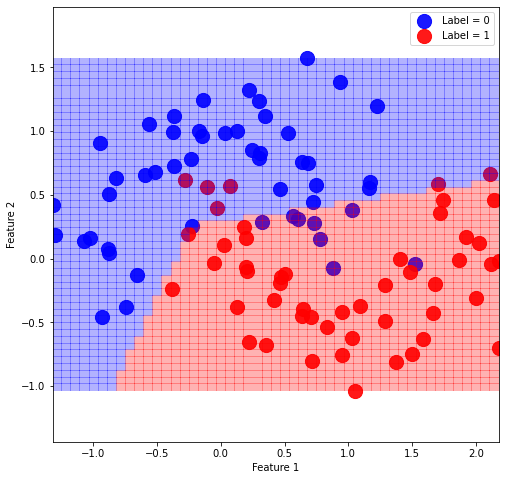

In [5]:
def plot_decision_surface(classifier, x, labels, ax=None, colors=None, n=50, alpha=0.3, marker_size=200, marker_alpha=0.9):
    nlabels   = np.unique( labels ).size
    colors    = plt.cm.viridis( np.linspace(0,1,nlabels) )  if (colors is None) else colors
    ax        = plt.gca() if (ax is None) else ax
    xmin,xmax = x.min(axis=0), x.max(axis=0)
    Xp,Yp     = np.meshgrid( np.linspace(xmin[0],xmax[0],n) , np.linspace(xmin[1],xmax[1],n) )
    xp        = np.vstack( [Xp.flatten(), Yp.flatten()] ).T
    labelsp   = classifier.predict(xp)
    Labelsp   = np.reshape(labelsp, Xp.shape)
    cmap      = ListedColormap(colors)
    for i,label in enumerate( np.unique(labels) ):
        xx   = x[labels==label]
        ax.scatter( xx[:,0], xx[:,1], color=colors[i], s=marker_size, alpha=marker_alpha, label=f'Label = {label}' )
    plt.pcolormesh(Xp, Yp, Labelsp, cmap=cmap, alpha=alpha)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.axis('equal')
    ax.legend()


plt.figure(figsize=(8,8))
plot_decision_surface(mlp, x, labels, colors=['b','r'])
plt.show()



<br>
<br>

We can see that the decision surface correctly classifies most of the observations, but not all of them.

How can we quantify how the classifier has performed?  One way is with the `accuracy_score` metric:

<br>
<br>

In [6]:

labels_pred = mlp.predict(x)                       # predicted labels
cr          = accuracy_score(labels, labels_pred)  # classification rate

print( f'Classification rate = {cr}' )


Classification rate = 0.86


<br>
<br>

This classification rate implies that only 86% of the observations's labels have been correctly predicted.

Is it possible to improve this accuracy?

One way to improve accuracy in machine learning problems is to adjust an algorithm's parameters.

<br>
<br>




Two key parameters of the MLP classifer are: `alpha` and `hidden_layer_sizes`.

- `alpha` is a parameter that helps avoid over-fitting. Greater values reduce over-fitting, and tend to make the decision surface geometrically simpler.

- `hidden_layer_sizes` are parameters that determine the upper bound of the decision surface's geometric complexity. Greater values imply that greater geometric complexity is achievable.

<br>
<br>

Changes to the `alpha` and `hidden_layer_sizes` can substsantially affect the decision surface.

Let's see what happens when some of the MLP classifier's parameters are changed.

Let's try using `alpha = 0.01` instead of `alpha = 0.5`, as above:

<br>
<br>



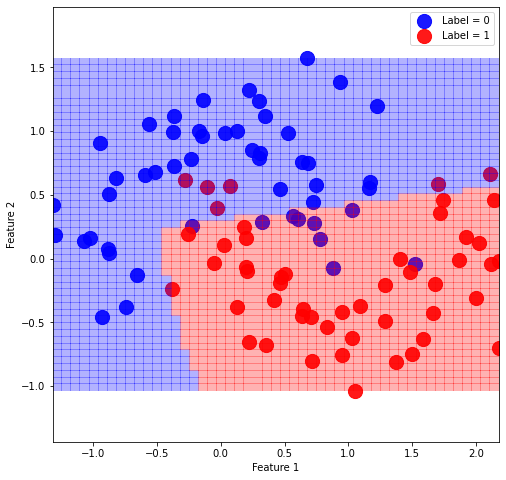

In [7]:

mlp    = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x, labels)


plt.figure(figsize=(8,8))
plot_decision_surface(mlp, x, labels, colors=['b','r'])
plt.show()



<br>
<br>

The decision surface has clearly changed. How about the classification rate?

<br>
<br>

In [8]:

labels_pred = mlp.predict(x)
cr          = accuracy_score(labels, labels_pred)

print( f'Classification rate = {cr}' )


Classification rate = 0.85


<br>
<br>

Oh no!  The classification rate has decreased. 

Let's next check the effct of increasing `alpha` to 3.

<br>
<br>

Classification rate = 0.85


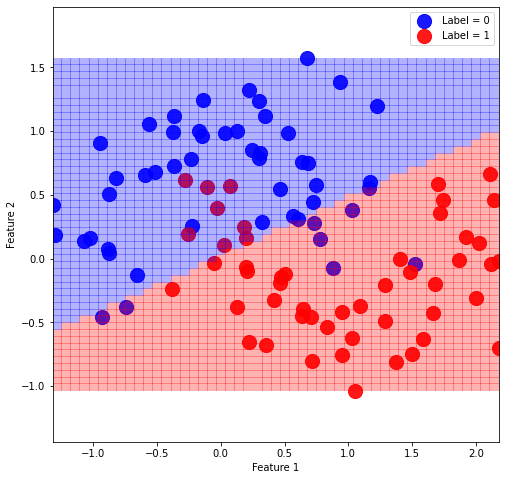

In [9]:

mlp    = MLPClassifier(solver='lbfgs', alpha=3, hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x, labels)

labels_pred = mlp.predict(x)
cr          = accuracy_score(labels, labels_pred)
print( f'Classification rate = {cr}' )

plt.figure(figsize=(8,8))
plot_decision_surface(mlp, x, labels, colors=['b','r'])
plt.show()



<br>
<br>

Again, the classification rate (CR) is not great.

Note that the decision surface is geometrically much simpler when `alpha = 3` than when `alpha = 0.5`. In other words, `hidden_layer_sizes=(5, 2)` implies that a relatively complex decision surface geometry is possible (like the first two figures above), but a large `alpha` value causes the decision surface geometry to become simpler.

Note also that, even though the geometry is simpler, the CR has not worsened. This demonstrates that a more complex geometric decision surface (i.e., a complex classifier) is not necessarily better than a simpler one.


<br>
<br>

Last, let's reduce `alpha` to a very small value (which will not prevent over-fitting), and also increase the `hidden_layer_sizes` (which will increase the achievable geometric complexity).

<br>
<br>

Classification rate = 0.97


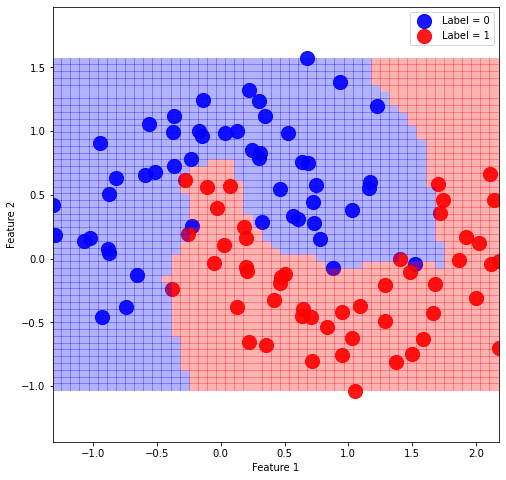

In [10]:

mlp    = MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(50, 20), random_state=1)
mlp.fit(x, labels)

labels_pred = mlp.predict(x)
cr          = accuracy_score(labels, labels_pred)
print( f'Classification rate = {cr}' )

plt.figure(figsize=(8,8))
plot_decision_surface(mlp, x, labels, colors=['b','r'])
plt.show()



<br>
<br>

Now we have achieved a quite high CR (0.97), but we have needed highly complex decision surface geometry in order to achieve this performance.

Has this decision surface been over-fitted?  The next notebook explains how this question can be addressed.

<br>
<br>

⚠️  The classification rate considered in this notebook pertains only to the **training set**.  In general machine learning problems, only the **test set** CR matters.  Nevertheless, the **training set** CR gives you an idea of the maximum expected accuracy. The next notebook demonstrates how to quantify and validate accuract for the **test set**. 

<br>
<br>

<br>
<br>

___
<a name="summary"></a>
# Summary
[Back to Table of Contents](#toc)

- Applying large `alpha` values (e.g. > 1) to an MLP classifier will simplify the decision surface geometry, irrespective of `hidden_layer_sizes`.

- When the `hidden_layer_sizes` are relatively small (e.g. < 5), only relatively simple decision surface geometry is achievable, regardless of `alpha`.

- When the `hidden_layer_sizes` are large (e.g. > 20), complex decision surface geometry is achievable, but `alpha` can be used to reduce the complexity.

<br>
<br>